# 檢視與處理 Outliers
### 為何會有 outliers, 常見的 outlier 原因
* 未知值，隨意填補 (約定俗成的代入)，如年齡常見 0,999
* 可能的錯誤紀錄/手誤/系統性錯誤，如某本書在某筆訂單的銷售量 = 1000 本

# [作業目標]
- 依照下列提示與引導, 以幾種不同的方式, 檢視可能的離群值

# [作業重點]
- 從原始資料篩選可能的欄位, 看看那些欄位可能有離群值 (In[3], Out[3])
- 繪製目標值累積密度函數(ECDF)的圖形, 和常態分布的累積密度函數對比, 以確認是否有離群值的情形 (In[6], Out[6], In[7], Out[7])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 請參考 HomeCredit_columns_description.csv 的欄位說明，觀察並列出三個你覺得可能有 outlier 的欄位並解釋可能的原因

In [ ]:
#了解欄位中的資料型態
app_train.info()
app_train.dtypes.value_counts()

Numbers of remain columns： 8


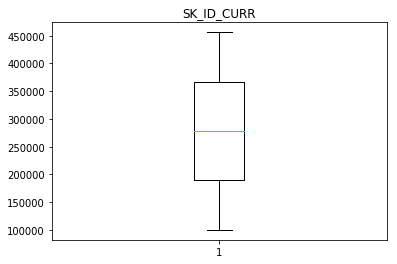

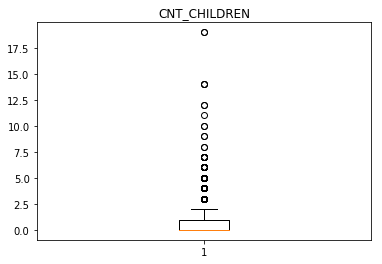

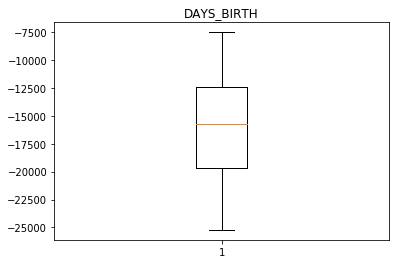

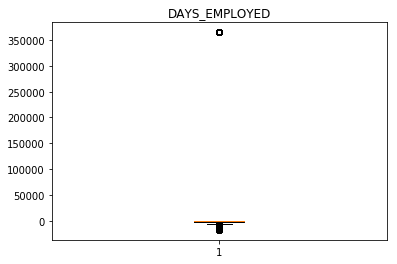

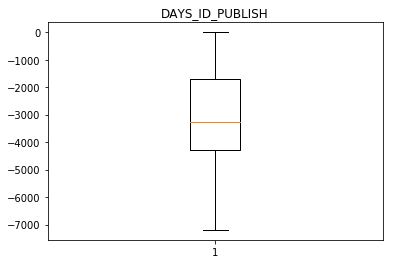

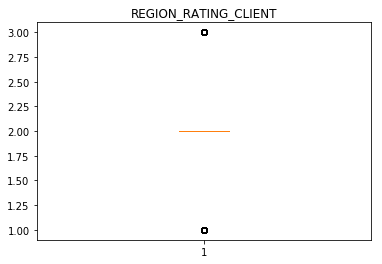

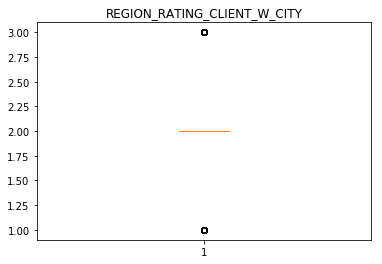

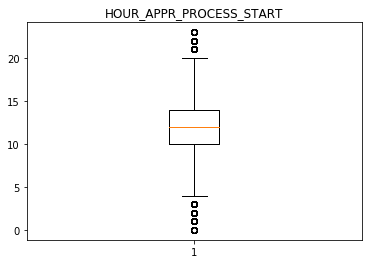

In [8]:
# 先篩選數值型的欄位  #fill correct data types (for example str, float, int, ...)

# way1
dtype_select = []  
numeric_columns = list(app_train.columns[list(app_train.dtypes.isin(dtype_select))]) #df.dtypes.isin()

# way 2 (easier)
numeric_columns = list(app_train.select_dtypes(include=['float32', 'int64']).columns)


# 再把只有 2值 (通常是 0,1) 的欄位去掉
# np.unique：去除重複數值

# app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 )

numeric_columns = list(app_train[numeric_columns].columns[list(app_train[numeric_columns].apply(lambda x:len(x.unique())!=2 ))])
print("Numbers of remain columns：" , len(numeric_columns))


# 檢視這些欄位的數值範圍   ？？？？？？？？？？？？？？？？

for col in numeric_columns:
    plt.boxplot(app_train[col])
    plt.title(app_train[col].name)  #顯示標題
    plt.show()



In [ ]:
# 從上面的圖檢查的結果，至少這三個欄位好像有點可疑

# AMT_INCOME_TOTAL
# REGION_POPULATION_RELATIVE
# OBS_60_CNT_SOCIAL_CIRCLE

### Hints: Emprical Cumulative Density Plot, [ECDF](https://zh.wikipedia.org/wiki/%E7%BB%8F%E9%AA%8C%E5%88%86%E5%B8%83%E5%87%BD%E6%95%B0), [ECDF with Python](https://stackoverflow.com/questions/14006520/ecdf-in-python-without-step-function)

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


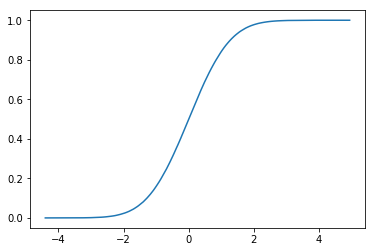

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 432x288 with 1 Axes>

"\ncdf = \n\nplt.plot(list(cdf.index), cdf/cdf.max())\nplt.xlabel('Value')\nplt.ylabel('ECDF')\nplt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍\nplt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍\n\nplt.show()\n\n# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF\nplt.plot(np.log(list(cdf.index)), cdf/cdf.max())\nplt.xlabel('Value (log-scale)')\nplt.ylabel('ECDF')\n\nplt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍\n\nplt.show()\n"

In [18]:
# 最大值離平均與中位數很遠
print(app_train['AMT_INCOME_TOTAL'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
from statsmodels.distributions.empirical_distribution import ECDF
xx = np.random.randn(len(app_train['AMT_INCOME_TOTAL']))
ecdf = sm.distributions.ECDF(xx)
plt.plot(ecdf.x, ecdf.y)
plt.show()

app_train['AMT_INCOME_TOTAL'].sort_values
plt.plot(app_train['AMT_INCOME_TOTAL'], ecdf(xx))
plt.show()
"""
cdf = 

plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min(), cdf.index.max() * 1.05]) # 限制顯示圖片的範圍
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()

# 改變 y 軸的 Scale, 讓我們可以正常檢視 ECDF
plt.plot(np.log(list(cdf.index)), cdf/cdf.max())
plt.xlabel('Value (log-scale)')
plt.ylabel('ECDF')

plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍

plt.show()
"""

## 補充：Normal dist 的 ECDF
![ecdf_normal](https://au.mathworks.com/help/examples/stats/win64/PlotEmpiricalCdfAndCompareWithSamplingDistributionExample_01.png)

In [10]:
# 最大值落在分布之外
print(app_train['REGION_POPULATION_RELATIVE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here
"""
"""
cdf = 


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()

app_train['REGION_POPULATION_RELATIVE'].hist()
plt.show()

app_train['REGION_POPULATION_RELATIVE'].value_counts()

# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，
# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏
"""

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


"cdf = \n\n\nplt.plot(list(cdf.index), cdf/cdf.max())\nplt.xlabel('Value')\nplt.ylabel('ECDF')\nplt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍\nplt.show()\n\napp_train['REGION_POPULATION_RELATIVE'].hist()\nplt.show()\n\napp_train['REGION_POPULATION_RELATIVE'].value_counts()\n\n# 就以這個欄位來說，雖然有資料掉在分布以外，也不算異常，僅代表這間公司在稍微熱鬧的地區有的據點較少，\n# 導致 region population relative 在少的部分較為密集，但在大的部分較為疏漏\n"

In [ ]:
# 最大值落在分布之外
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].describe())

# 繪製 Empirical Cumulative Density Plot (ECDF)
"""
Your Code Here

cdf = 


plt.plot(list(cdf.index), cdf/cdf.max())
plt.xlabel('Value')
plt.ylabel('ECDF')
plt.xlim([cdf.index.min() * 0.95, cdf.index.max() * 1.05])
plt.ylim([-0.05,1.05]) # 限制顯示圖片的範圍
plt.show()
"""
app_train['OBS_60_CNT_SOCIAL_CIRCLE'].hist()
plt.show()
print(app_train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().sort_index(ascending = False))

## 注意：當 histogram 畫出上面這種圖 (只出現一條，但是 x 軸延伸很長導致右邊有一大片空白時，代表右邊有值但是數量稀少。這時可以考慮用 value_counts 去找到這些數值

In [20]:
# 把一些極端值暫時去掉，在繪製一次 Histogram

# 選擇 OBS_60_CNT_SOCIAL_CIRCLE 小於 20 的資料點繪製
app_train['DAYS_EMPLOYED'].value_counts()

#app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

"""
loc_a = 
loc_b = 

app_train.loc[loc_a, loc_b].hist()
plt.show()
"""

'\nloc_a = \nloc_b = \n\napp_train.loc[loc_a, loc_b].hist()\nplt.show()\n'